# Predicción de precio de vuelos 
---

En el contexto de la ciencia de datos, es fundamental aplicar técnicas que permitan preparar datos reales para un análisis confiable y útil. Esta tarea tiene como propósito aplicar habilidades de limpieza, transformación y análisis exploratorio sobre un conjunto de datos real, disponible públicamente en la plataforma Kaggle.
Para este trabajo, se seleccionó un conjunto de datos sobre la ***predición de precios de vuelo***, que se encuentra en el siguiente link:
<p align = "center">
<a href="https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data">Flight Price Prediction</a>
</p>
Así mismo se encontraran dichos datos en un archivo .csv adjunto

---

El dataset elegido contiene información sobre vuelos domésticos en India, incluyendo variables como:

- Fecha y hora de salida y llegada.

- Duración del vuelo.

- Escalas (número de paradas).

- Aerolínea, ciudad de origen y destino.

- Precio del boleto.

Este conjunto de datos es idóneo para este trabajo debido a que:

Datos reales del mundo: Las características y relaciones reflejan situaciones del mercado real, lo cual permite aplicar técnicas de preprocesamiento relevantes y con sentido práctico.

Presencia de datos sucios: Existen valores con formatos no estandarizados, datos categóricos sin codificar y posibles datos faltantes, lo cual requiere una limpieza cuidadosa.

Requiere transformaciones complejas: Por ejemplo, convertir duración a minutos, extraer horas o días de las fechas, o aplicar codificación a las variables categóricas.

Permite análisis exploratorio significativo: Se pueden identificar patrones en precios según ruta, escalas, aerolínea, entre otros factores.

Potencial para modelos predictivos: Aunque no es el foco principal, la estructura del dataset facilita futuras extensiones hacia aprendizaje automático, como para lo que originalmente fue diseñado: **Una aplicación de la regresión lineal multivariable**.


---

## Limpieza y transformación de datos

Primeramente se analizarán los datos obtenidos desde el csv (archivo que contiene los datos) de los precios de los vuelos.

En este apartado realizaremos:
- Identificación de valores extremos mediante la utilización de diagramas de caja.
- Manejo de registros duplicados.
- Visualización general de los datos.
<br>

**Importación de las librerias a utilizar y del archivo de datos**

Se importan las librerías a utilizar durante todo el proyecto, entre las cuales podemos mencionar:
- **Pandas**: Es una librería que permite la manipulación y el análisis de datos. Nos permitirá realizar la manipulación de los datos desde nuestra fuente de datos.
- **Numpy**: Es una librería que se utiliza para trabajar con arrays. Además de incluir funciones en el dominio del álgebra lineal, transformadas de fourier (en este trabajo no serán utilizadas) y matrices.
- **Matplotlib.pyplot**: Esta librería nos ayudará para poder realizar gráficos y observar de una mejor manera los datos visualmente

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ya que tenemos las librerías necesarias para trabajar, procedemos a importar los datos con los que vamos a trabajar.

Podemos observar un ejemplo de los datos que incluye la tabla:

In [24]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Para la limpieza de datos, primeramente eliminaremos posibles datos repetidos dentro del dataframe.

In [25]:
df = df.drop_duplicates()

Con los datos duplicados eliminados, procederemos a quitar las columnas que no son muy necesarias, como podría ser: `Unnamed: 0` y `flight`. Ya que la primera es simplemente el índice de las filas, y la segunda es un dato muy específico que no nos ayudará mucho en el análisis de los datos.

In [26]:
df = df.drop(columns=['Unnamed: 0', 'flight'])
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Con estas limpiezas de datos realizadas, procederemos a la transformación de datos categóricos a datos numéricos con el fin tener toda la tabla con datos que sean posibles analizarlos numéricamente.
<br>

Entre estos datos se encuentran la columna `class` debido a que solo existen 2 clases (siendo estas la económica y Business) pueden ser transformadas a un dato Booleano (0 o 1).
<br>

Así mismo la columna `stops` puede ser cambiada de strings que representan números a los valores a los que hacen referencia.

In [27]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df.stops = pd.factorize(df.stops)[0]

Procederemos a realizar el preprocesamiento de las variables categóricas.

Primeramente agruparemos valores poco frecuentes y luego convertiremos categorías a variables numéricas:

In [28]:
# Recorreremos las columnas categóricas principales y contaremos cuantas veces aparecen estas categorías
for col in ['source_city', 'destination_city', 'departure_time', 'arrival_time']:
    counts = df[col].value_counts()
    common = counts[counts > 100].index  # Si una de estas categorías aparece menos de 100 veces, será reemplazada por "Other"
    df[col] = df[col].where(df[col].isin(common), other='Other')

# Procedemos a aplicar One-hot encoding a las columnas indicadas, esto nos permitirá convertir estas categorías en columnas booleanas
df = pd.get_dummies(df, columns=[
    'source_city', 'destination_city',
    'departure_time', 'arrival_time', 'stops', 'class'
], drop_first=True)#Esta parte evita multicolinealidad al eliminar la primera categoría.

df

,airline,duration,days_left,price,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,...,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_1,stops_2,class_1
0,SpiceJet,2.17,1,5953,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,SpiceJet,2.33,1,5953,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,AirAsia,2.17,1,5956,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,Vistara,2.25,1,5955,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,Vistara,2.33,1,5955,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,10.08,49,69265,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,True
300149,Vistara,10.42,49,77105,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
300150,Vistara,13.83,49,79099,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
300151,Vistara,10.00,49,81585,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


---

## Análisis exploratorio

A continuación realizaremos un análisis de los datos que se han obtenido desde nuestra fuente de datos.

#### Análisis estadístico

In [29]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Para este análisis (debido a la naturaleza del baco de datos) centraremos el análisis de los datos en con respecto al precio de los vuelos.

**Análisis de medidas de tendencia central**

Mediante tabla tabla anterior podemos visualizar las medidas de tendencia central y de dispersión de los datos numéricos. Primeramente se nos muestra que tenemos 300153 datos en total.
Con una media de 20889.66$ en los precios y una mediana de 7425$. Esta gran diferencia existente entre la media y la mediana de los datos, nos puede dar un indicador de que los datos no se encuentran acumulados en el centro, más bien poseemos datos muy dispersos.

Gracias a los cuartiles que nos ofrecen las medidas, podemos concluir que (además que los datos se encuentran dispersos) los precios se encuentran mayormente agrupado en valores bajos de precios. 

**Análisis de valores extremos**

A continuación realizaremos un análisis para verificar si los datos de los precios poseen datos extremos (o outliers). Esto debido a que la existencia de valores extremos al buscar una función que permita aproximar el valor de los datos pueden generar un gran impacto al generar la recta de regresión; además de sesgar fuertemente el modelo, lo que hace que se vuelva menos representativo con respecto al comportamiento general de los datos.


Para poder verificar la existencia de valores extremos, buscaremos encontrar dentro de qué rango, los datos pueden ser representativos.
Esto se calcula encontrando el rango intercuartílico (R.I); Este se encuentra realizando la resta entre los cuartiles 3 y 1 (en la tabla de descripción de los datos están representados como el 75% y el 25%):

Sea $Q_{n}$ el cuartil $n$:
$$
\mathbf{R.I}=Q_{3}-Q_{1}
$$
Al realizar esta operación con los datos obtenidos, obtenemos que nuestro rango intercuartílico es de:
$$
\mathbf{R.I}=42521-4783=37738
$$

Con el R.I obtenido, podemos encontrar el intervalo donde los datos son representativos, esto se calcula de la siguiente manera:
$$
\begin{gather*}
[Q_{1}-1.5\cdot \mathbf{R.I},\, Q_{3}+1.5\cdot \mathbf{R.I}]\\
[4783-1.5\cdot 37738,\, 42521+1.5\cdot 37738 ]\\
[-51824,\, 99128]
\end{gather*}
$$

Debido a que el valor del límite inferior del intervalo sale del dominio de los valores de los precios, se tomará que el límite inferior será el valor mínimo existente en los datos (que es de 1105$):
$$
[1105,\, 99128]
$$

---

## Visualización de resultados



A continuació realizaremos la visualización de los datos, y podremos obtener distintas conclusiones a partir de estos.

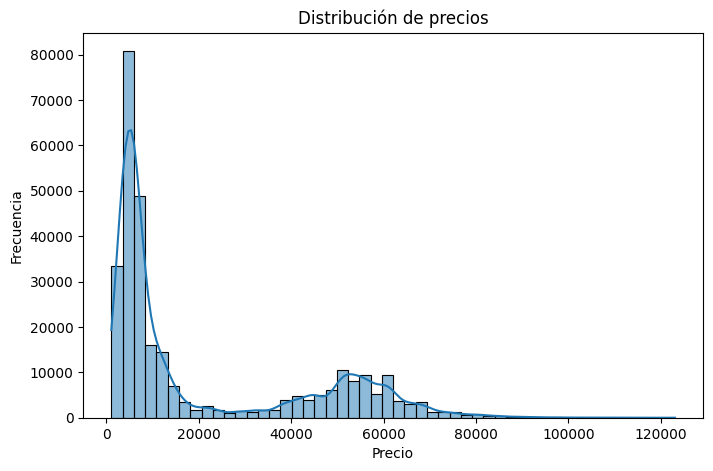

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

El histograma de distribución de precios revela una clara asimetría positiva: la mayoría de los vuelos tienen precios concentrados en rangos bajos o medios, mientras que un número reducido de vuelos presenta precios significativamente más altos. Esto indica la presencia de outliers o valores extremos, que podrían deberse a clases premium, aerolíneas específicas o rutas largas. La forma de la distribución sugiere que una normalización o transformación logarítmica podría ser útil en etapas posteriores de modelado.

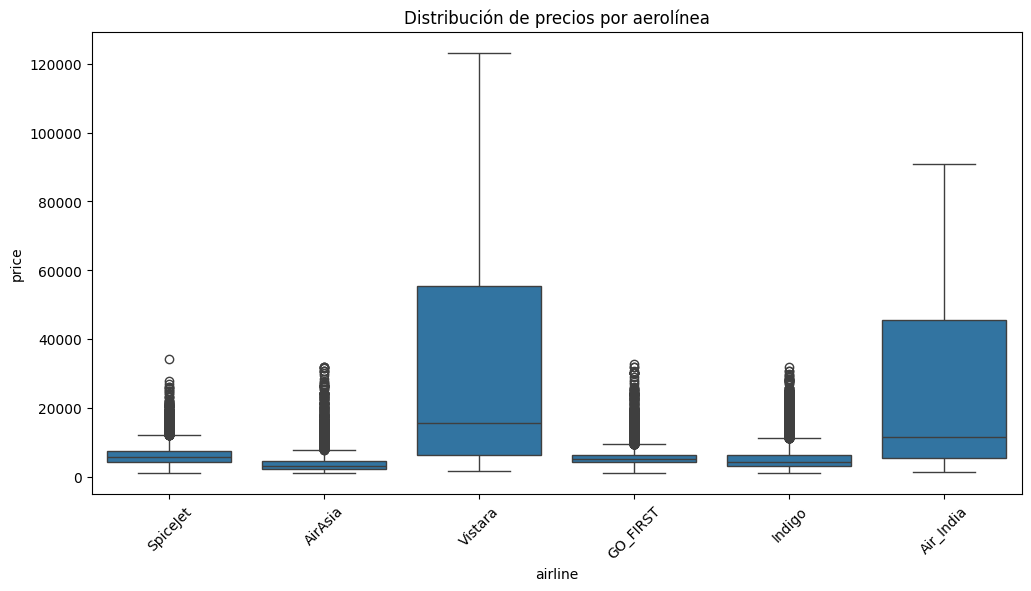

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de precios por aerolínea')
plt.show()

El boxplot de precios por aerolínea permite comparar visualmente la dispersión y tendencia central del costo de los vuelos según la empresa operadora. Se observa que algunas aerolíneas, como Jet Airways Business o Air India, tienden a tener precios más altos, mientras que otras, como IndiGo o SpiceJet, ofrecen vuelos más económicos. También se evidencian diferencias en la variabilidad interna: aerolíneas con alta dispersión podrían estar operando en múltiples rutas o clases, mientras que otras tienen ofertas más homogéneas.

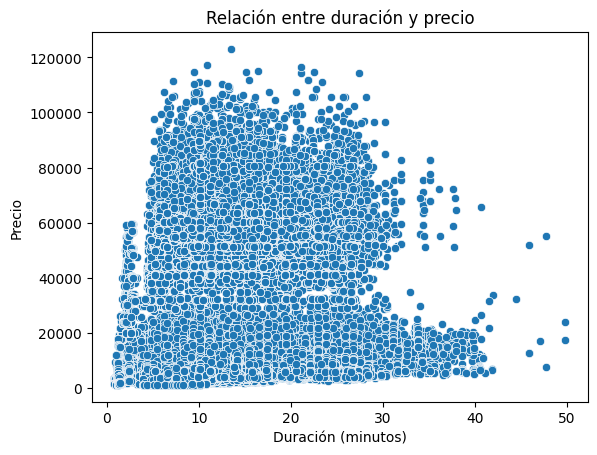

In [32]:
sns.scatterplot(x='duration', y='price', data=df)
plt.title('Relación entre duración y precio')
plt.xlabel('Duración (minutos)')
plt.ylabel('Precio')
plt.show()

El gráfico de dispersión entre la duración del vuelo y su precio muestra una tendencia creciente, aunque no perfectamente lineal. En general, vuelos con mayor duración tienden a tener precios más altos, lo cual es esperable dado que implican mayores distancias o rutas más complejas. Sin embargo, también se identifican vuelos largos con precios bajos, posiblemente correspondientes a ofertas o escalas largas. La nube de puntos dispersa sugiere que hay otros factores influyentes además de la duración.

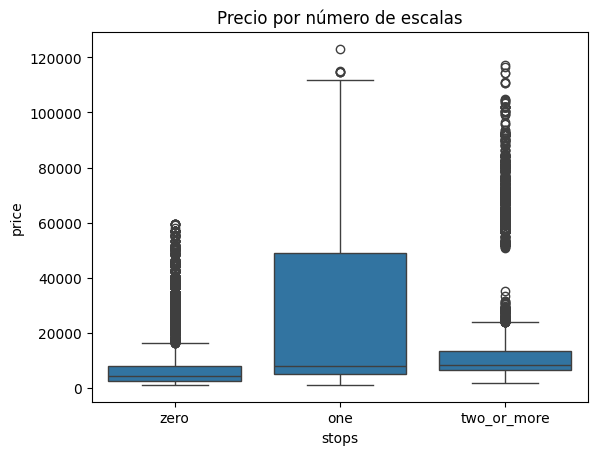

In [35]:
df_backup = pd.read_csv('Clean_Dataset.csv')
sns.boxplot(x='stops', y='price', data=df_backup)
plt.title('Precio por número de escalas')
plt.show()

El boxplot por número de escalas muestra una relación clara entre la cantidad de paradas y el precio del vuelo. Los vuelos directos (sin escalas) tienden a ser más costosos en promedio, mientras que los vuelos con una o más escalas tienden a ser más económicos, aunque más variables. Esto refleja la lógica comercial de los vuelos: la comodidad de un vuelo directo se traduce en un costo adicional. También se aprecia una mayor dispersión de precios en vuelos con escalas múltiples.

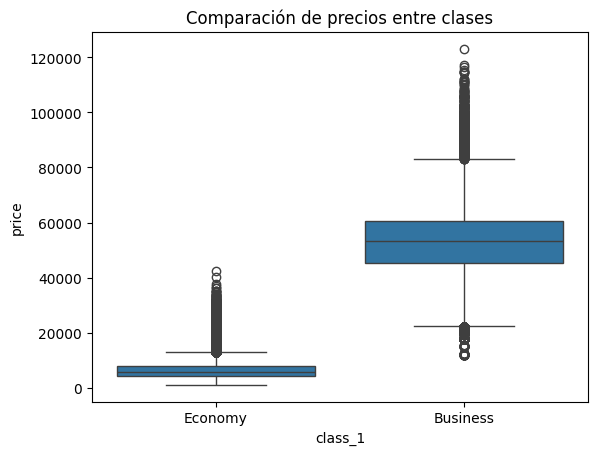

In [37]:
sns.boxplot(x='class_1', y='price', data=df)
plt.xticks([0, 1], ['Economy', 'Business'])
plt.title('Comparación de precios entre clases')
plt.show()

Al comparar los precios según la clase (económica vs. ejecutiva o business), el gráfico evidencia una diferencia notable. Los vuelos en clase ejecutiva presentan precios significativamente más altos y una dispersión mayor, lo que refleja tanto el nivel superior del servicio como la posible variabilidad por aerolínea o ruta. Por el contrario, los precios en clase económica son más bajos y relativamente estables, lo cual es consistente con la oferta estandarizada de este tipo de servicio.